# M-P模型实现

In [2]:
import numpy as np 

def step_func(x):
    # 阶跃函数
    if x > 0:
        return 1
    else:
        return 0

class MP:
    # M-P模型类
    def __init__(self,w,theta,activate_func=step_func):
        self.theta = theta  # 阈值
        self.w = w          # 权值
        self.activate_func = activate_func  # 激活函数
    
    def forward(self,x):
        u = np.dot(self.w,x)
        return self.activate_func(u - self.theta)

In [232]:
# 手动设计与或非的MP模型参数
mp_and = MP(w=np.array([1,1]),theta=1.5)
mp_or = MP(w=np.array([1,1]),theta=0.5)
mp_not = MP(w=np.array([-2]),theta=-1)

# 数据集
X = [(0,0),(0,1),(1,0),(1,1)]
Y_and = [0,0,0,1]
Y_or = [0,1,1,1]

In [217]:
import matplotlib.pyplot as plt
def draw_and(p,q,a):
    x1 = np.arange(-2, 2, 0.1)
    x2 = (a - p * x1) / (q)
    plt.scatter(1, 1, color='red')
    plt.scatter(0, 0, color='blue')
    plt.scatter(0, 1, color='blue')
    plt.scatter(1, 0, color='blue')
    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.plot(x1, x2)
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()  # 显示坐标图
    
def draw_or(p,q,a):
    x1 = np.arange(-2, 2, 0.1)
    x2 = (a - p * x1) / (q)
    plt.scatter(1, 1, color='red')
    plt.scatter(0, 0, color='blue')
    plt.scatter(0, 1, color='red')
    plt.scatter(1, 0, color='red')
    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.plot(x1, x2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()  # 显示坐标图

AND	 (0, 0) 	正确结果： 0 	预测结果： 0
AND	 (0, 1) 	正确结果： 0 	预测结果： 0
AND	 (1, 0) 	正确结果： 0 	预测结果： 0
AND	 (1, 1) 	正确结果： 1 	预测结果： 1


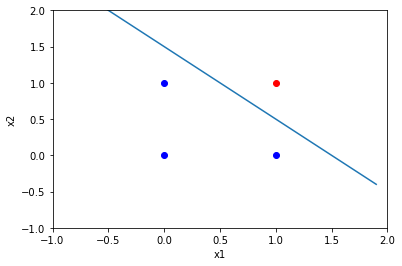

In [233]:
for m in zip(X,Y_and):
    print('AND\t',m[0],'\t正确结果：',m[1],'\t预测结果：',mp_and.forward(m[0]))
    
draw_and(1,1,1.5)

OR	 (0, 0) 正确结果： 0 预测结果： 0
OR	 (0, 1) 正确结果： 1 预测结果： 1
OR	 (1, 0) 正确结果： 1 预测结果： 1
OR	 (1, 1) 正确结果： 1 预测结果： 1


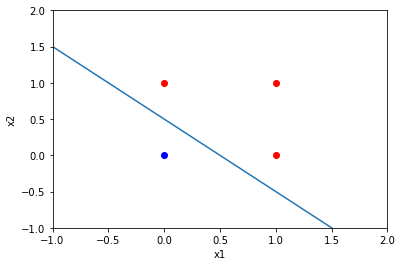

In [234]:
for m in zip(X,Y_or):
    print('OR\t',m[0],'正确结果：',m[-1],'预测结果：',mp_or.forward(m[0]))
draw_or(1,1,0.5)

In [5]:
for x in [0,1]:    
    print('NOT',x,mp_not.forward(x))

NOT 0 1
NOT 1 0


# 感知机模型的实现

In [235]:
import numpy as np

def sign_func(x):
    # 符号函数
    if x >= 0:
        return 1
    else:
        return -1
    
class Perceptron:
    # 感知机模型
    def __init__(self,dim,lr=0.1,epoch=10,activate_func=sign_func):
        self.dim = dim
        self.weight = np.random.rand(dim)
        self.bias = np.random.rand(1)
        self.lr = lr
        self.epoch = epoch
        self.activate_func = activate_func
        self.last_loss = None
    
    def __str__(self):
        return f'weight:{self.weight} bias:{self.bias} loss:{self.last_loss}'
    
    def loss(self,X,Y):
        # 损失函数
        l = 0
        for x,y in zip(X,Y):
            u = np.dot(self.weight,x) + self.bias
            y_pred = self.activate_func(u)
            if y_pred != y:
                l += 1
        self.last_loss = l
        return l

    def train_one_step(self,x,y):
        # 训练单步
        # 梯度下降法调整权重
        u = np.dot(self.weight,x) + self.bias
        y_pred = self.activate_func(u)
        if y_pred != y:
            self.weight += np.dot(self.lr * y,x)
            self.bias += self.lr * y
        return self.weight,self.bias

    def train(self,X,Y):
        # 训练
        for i in range(self.epoch):
            for x,y in zip(X,Y):
                self.train_one_step(x,y)
                self.loss(X,Y)
            # print('epoch:',i,'weight:',self.weight,'bias:',self.bias,'loss:',self.loss(X,Y)

    def predict(self,x):
        # 预测
        u = np.dot(self.weight,x) + self.bias
        return self.activate_func(u)

In [236]:
#  设置数据集
X = [(-1,-1),(-1,1),(1,-1),(1,1)]
Y_and = [-1,-1,-1,1]
Y_or = [-1,1,1,1]
Y_xor = [-1,1,1,-1]

# 实例化
p_and = Perceptron(dim=2,lr=0.3,epoch=10)
p_and.train(X,Y_and)

p_or = Perceptron(dim=2,lr=0.3,epoch=10)
p_or.train(X,Y_or)

p_xor = Perceptron(dim=2,lr=0.3,epoch=10)
p_xor.train(X,Y_xor)

In [227]:
import matplotlib.pyplot as plt
def draw2_and(p,q,b):
    x1 = np.arange(-2, 2, 0.1)
    x2 = ( - b - p*x1 ) / q
    plt.scatter(1, 1, color='red')
    plt.scatter(-1, -1, color='blue')
    plt.scatter(-1, 1, color='blue')
    plt.scatter(1, -1, color='blue')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.plot(x1, x2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()  # 显示坐标图
    
def draw2_or(p,q,b):
    x1 = np.arange(-2, 2, 0.1)
    x2 = ( - b - p*x1 ) / q
    plt.scatter(1, 1, color='red')
    plt.scatter(-1, -1, color='blue')
    plt.scatter(-1, 1, color='red')
    plt.scatter(1, -1, color='red')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.plot(x1, x2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()  # 显示坐标图
    
def draw2_xor(p,q,b):
    x1 = np.arange(-2, 2, 0.1)
    x2 = ( - b - p*x1 ) / q
    plt.scatter(1, 1, color='red')
    plt.scatter(-1, -1, color='red')
    plt.scatter(-1, 1, color='blue')
    plt.scatter(1, -1, color='blue')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.plot(x1, x2)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()  # 显示坐标图

AND	 (-1, -1) 	正确结果： -1 	预测结果： -1
AND	 (-1, 1) 	正确结果： -1 	预测结果： -1
AND	 (1, -1) 	正确结果： -1 	预测结果： -1
AND	 (1, 1) 	正确结果： 1 	预测结果： 1
weight:[0.45301936 0.2956014 ] bias:[-0.52929178] loss:0


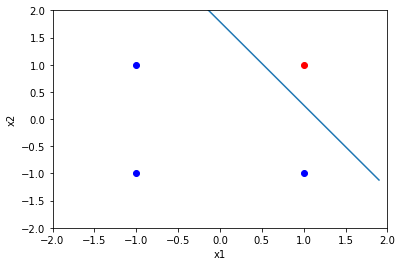

In [237]:
# 与

for m in zip(X,Y_and):
    print('AND\t',m[0],'\t正确结果：',m[-1],'\t预测结果：',p_and.predict(m[0]))
print(p_and)
draw2_and(p_and.weight[0],p_and.weight[1],p_and.bias)

OR	 (-1, -1) 	正确结果： -1 	预测结果： -1
OR	 (-1, 1) 	正确结果： 1 	预测结果： 1
OR	 (1, -1) 	正确结果： 1 	预测结果： 1
OR	 (1, 1) 	正确结果： 1 	预测结果： 1
weight:[0.61929347 0.67498021] bias:[0.53990297] loss:0


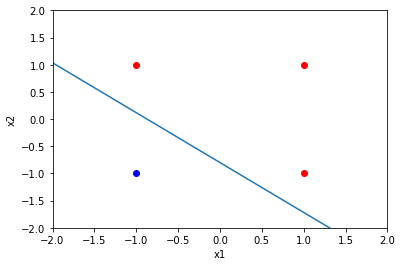

In [238]:
# 或

for m in zip(X,Y_or):
    print('OR\t',m[0],'\t正确结果：',m[-1],'\t预测结果：',p_or.predict(m[0]))
print(p_or)
draw2_or(p_or.weight[0],p_or.weight[1],p_or.bias)

XOR	 (-1, -1) 	正确结果： -1 	预测结果： 1
XOR	 (-1, 1) 	正确结果： 1 	预测结果： -1
XOR	 (1, -1) 	正确结果： 1 	预测结果： 1
XOR	 (1, 1) 	正确结果： -1 	预测结果： -1
weight:[ 0.02603104 -0.44504883] bias:[-0.03626733] loss:2


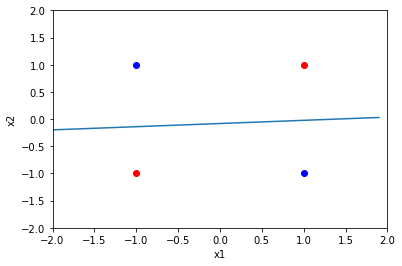

In [239]:
# 异或（无法）

for m in zip(X,Y_xor):
    print('XOR\t',m[0],'\t正确结果：',m[-1],'\t预测结果：',p_xor.predict(m[0]))
print(p_xor)
draw2_xor(p_xor.weight[0],p_xor.weight[1],p_xor.bias)

# 使用口袋算法改进
## 引入口袋保存效果最好的权重和结果
## 两条规则
- 样本随机
- 检查结果，防止劣化

In [240]:
import random

class Pocket:
    # 口袋类
    # 保存最好的一次权重、偏置和loss值
    def __init__(self,weight,bias,loss):
        self.weight = weight
        self.bias = bias
        self.loss = loss

class PocketPerceptron(Perceptron):
    def __init__(self,dim,lr=0.1,epoch=10,activate_func=sign_func):
        super().__init__(dim,lr,epoch,activate_func)
        self.pocket = None
    
    def __str__(self):
        return f'weight:{self.pocket.weight} bias:{self.pocket.bias} loss:{self.pocket.loss}'

    
    def train(self,X,Y):
        # 训练
        # 随机打乱数据
        dataset = list(zip(X,Y))
        random.shuffle(dataset)

        for i in range(self.epoch):
            for x,y in dataset:
                w,b = self.train_one_step(x,y)
                l = self.loss(X,Y)
                if not self.put_into_pocket((l,w,b)):
                    # 没有放入口袋就代表结果劣化，放弃结果，参数重置为口袋内参数
                    self.weight = self.pocket.weight
                    self.bias = self.pocket.bias
                    self.loss = self.pocket.loss
    
    def put_into_pocket(self,result):
        # 检查是否放入口袋，防止劣化
        if self.pocket == None:
            self.pocket = Pocket(result[1],result[2],result[0])
            return True
        else:
            if self.pocket.loss > result[0]:
                self.pocket = Pocket(result[1],result[2],result[0])
            return True
        return False
            
            # print('epoch:',i,'weight:',self.weight,'bias:',self.bias,'loss:',self.loss(X,Y)

weight:[0.20927496 0.24804245] bias:[-0.0714298] loss:0


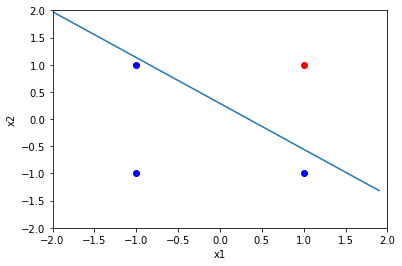

AND	 (-1, -1) 	正确结果： -1 	预测结果： -1
AND	 (-1, 1) 	正确结果： -1 	预测结果： -1
AND	 (1, -1) 	正确结果： -1 	预测结果： -1
AND	 (1, 1) 	正确结果： 1 	预测结果： 1


In [241]:
pocket_percetron_and = PocketPerceptron(dim=2)
pocket_percetron_and.train(X,Y_and)

print(pocket_percetron_and)
draw2_and(pocket_percetron_and.pocket.weight[0],pocket_percetron_and.pocket.weight[1],pocket_percetron_and.pocket.bias)
for m in zip(X,Y_and):
    print('AND\t',m[0],'\t正确结果：',m[-1],'\t预测结果：',pocket_percetron_and.predict(m[0]))

weight:[0.54055169 0.42016706] bias:[0.30762914] loss:0


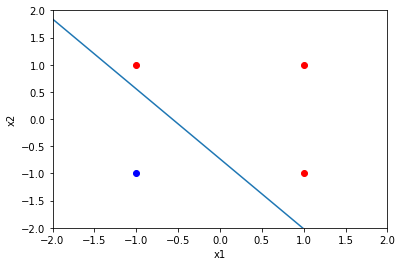

or	 (-1, -1) 	正确结果： -1 	预测结果： -1
or	 (-1, 1) 	正确结果： 1 	预测结果： 1
or	 (1, -1) 	正确结果： 1 	预测结果： 1
or	 (1, 1) 	正确结果： 1 	预测结果： 1


In [242]:
pocket_percetron_or = PocketPerceptron(dim=2)
pocket_percetron_or.train(X,Y_or)

print(pocket_percetron_or)
draw2_or(pocket_percetron_or.pocket.weight[0],pocket_percetron_or.pocket.weight[1],pocket_percetron_or.pocket.bias)
for m in zip(X,Y_or):
    print('or\t',m[0],'\t正确结果：',m[-1],'\t预测结果：',pocket_percetron_or.predict(m[0]))

# 小结

## 区别与联系
- 阈值与偏置
- 手动与自动
- loss和lr
- 针对线性可分问题